**Agata Semerjak**, 402426  
środa 17:00

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

data = load_wine()
y = data.target
X = pd.DataFrame(data.data, columns = data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## SIngle decision tree

In [ ]:
single_tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
single_tree = single_tree.fit(X, y)

print("Accuracy:", metrics.accuracy_score(y_test, single_tree.predict(X_test)))
print("Cross val score:", cross_val_score(single_tree, X, y))


Accuracy: 0.9814814814814815
Cross val score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]


## Bagged decision tree

In [ ]:
bagged_tree = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50)
bagged_tree = bagged_tree.fit(X, y)

print("Accuracy:", metrics.accuracy_score(y_test, bagged_tree.predict(X_test)))
print("Cross val score:", cross_val_score(bagged_tree, X, y))

Accuracy: 1.0
Cross val score: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]


## AdaBoost algorithm for decision trees

In [ ]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
ada_boost = ada_boost.fit(X, y)

print("Accuracy:", metrics.accuracy_score(y_test, ada_boost.predict(X_test)))
print("Cross val score", cross_val_score(ada_boost, X, y))

Accuracy: 1.0
Cross val score [0.83333333 0.91666667 0.91666667 1.         1.        ]


## Gradient Boosting algorithm for decision trees

Accuracy: 1.0
Cross val score: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857] 



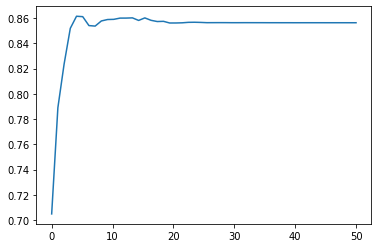

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
grad_boost = grad_boost.fit(X, y)

print("Accuracy:", metrics.accuracy_score(y_test, grad_boost.predict(X_test)))
print("Cross val score:", cross_val_score(grad_boost, X, y), "\n")

cs = np.cumsum(grad_boost.oob_improvement_)
plt.figure()
x_plot = np.linspace(0, len(cs), 50)
plt.plot(x_plot, cs)
plt.show()

After about 10 iterations there is no improvement.